In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import warnings

In [2]:
# Filter out the specific warning about feature names not matching
warnings.filterwarnings("ignore", message="X does not have valid feature names, but NearestNeighbors was fitted with feature names")

In [3]:
# Load the movie-item matrix from the CSV file and display the first 10
user_item_matrix = pd.read_csv('./data_for_ml.csv')
user_item_matrix.head(10)

,title,Year,average_rating,rating_count,Animation,Adventure,Mystery,Drama,Action,Romance,...,Comedy,Thriller,Crime,Documentary,Children,Sci-Fi,IMAX,Western,Fantasy,Horror
0,Inception (2010),2010.0,4.44,8817,0,0,1,1,1,0,...,0,1,1,0,0,1,1,0,0,0
1,Eternal Sunshine of the Spotless Mind (2004),2004.0,4.51,4507,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,"Dark Knight, The (2008)",2008.0,4.38,3598,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,"Prestige, The (2006)",2006.0,4.34,3598,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,"Lord of the Rings: The Fellowship of the Ring,...",2001.0,4.45,3372,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Inglourious Basterds (2009),2009.0,4.19,3278,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,"Grand Budapest Hotel, The (2014)",2014.0,4.25,2911,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,"Lord of the Rings: The Return of the King, The...",2003.0,4.48,2845,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
8,The Martian (2015),2015.0,4.17,2809,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9,Django Unchained (2012),2012.0,4.30,2794,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


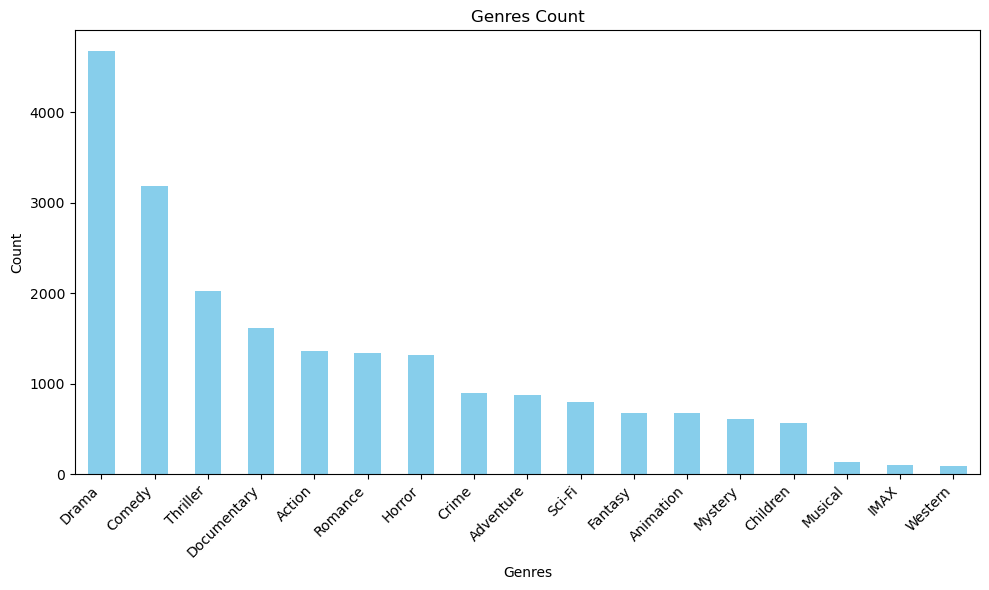

<Figure size 640x480 with 0 Axes>

In [11]:
df = pd.DataFrame(user_item_matrix)

# Summing up genres to get total count
genre_counts = df.iloc[:, 4:].sum()

# Sorting genres in descending order
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Plotting the sorted genres
plt.figure(figsize=(10, 6))
genre_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Genres Count')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('genres_plot.png')

In [4]:
# 1. Handle missing values - dropping rows with missing values
user_item_matrix.dropna(inplace=True)

# 2. Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = ['Year', 'average_rating', 'rating_count']
user_item_matrix[numerical_cols] = scaler.fit_transform(user_item_matrix[numerical_cols])

# 3. Encode categorical variables (Genre) 
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
              'Drama', 'Fantasy', 'Horror', 'IMAX', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western']
encoder = OneHotEncoder(sparse_output=False)
encoded_genres = encoder.fit_transform(user_item_matrix[genre_cols])

# Create feature names for the encoded genres
feature_names = []
for category_list in encoder.categories_:
    feature_names.extend(category_list)

# Create a DataFrame for the encoded genres with proper column names
encoded_genres_df = pd.DataFrame(encoded_genres, columns=feature_names)
user_item_matrix_encoded = pd.concat([user_item_matrix.drop(columns=genre_cols), encoded_genres_df], axis=1)

# Display the encoded DataFrame
encoded_genres_df

,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
11231,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
11232,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
11233,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
# Initialize the K-Nearest Neighbors Model 
knn_movie_model = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

# Define the Recommendation Algorithm Function
def recommendation_algorithm(movie_name, matrix, movie_cf_model, n_recs):
    # Fit model on matrix
    movie_cf_model.fit(matrix.drop(['title', 'Year', 'average_rating', 'rating_count'], axis=1, errors='ignore'))
    
    # Try to find a close match for the movie name input using FuzzyWuzzy search
    match = process.extractOne(movie_name, matrix.index)
    print("Match:", match)  # Error handling statement if movie is not found
    if match and match[1] > 70:  
        movie_name_matched = match[0]
    else:
        return "Movie not found or not a close match."
   
    # Get the movie title for the matched index and print the matched movie title
    matched_movie_title = matrix.loc[movie_name_matched, 'title']
    print("Matched Movie Title:", matched_movie_title) 
    
    # Get the movie row based on the matched movie name
    movie_row = matrix.loc[movie_name_matched]
    
    # Calculate neighbor distances
    distances, indices = movie_cf_model.kneighbors(movie_row.drop(['title', 'Year', 'average_rating', 'rating_count'], errors='ignore').values.reshape(1, -1), n_neighbors=n_recs)
    movie_rec_ids = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    # List to store recommendations
    movie_recs = []
    for i in movie_rec_ids:
        movie_recs.append({'Movie ID': matrix.iloc[i[0]].name, 'Distance': i[1]})
    
    # Display the movie titles for the recommended movies
    recommended_movies = pd.DataFrame(movie_recs)
    recommended_movies['Title'] = recommended_movies['Movie ID'].apply(lambda x: matrix.loc[x, 'title'])
    
    # Select top number of recommendations needed
    recommended_movies = recommended_movies[['Title', 'Distance']].head(n_recs)
    
    return recommended_movies

# Print the matched movie title and a list of 10 recommended movies with their distance to the input, sorted by Distance
recommended_movies = recommendation_algorithm("#Alive (2020)", user_item_matrix, knn_movie_model, 11)
recommended_movies.sort_values("Distance").reset_index(drop=True)

Match: (20, 90)
Matched Movie Title: Gravity (2013)


,Title,Distance
0,The Amazing Spider-Man 2 (2014),0.000000
1,Gravity (2013),0.000000
2,Men in Black III (M.III.B.) (M.I.B.³) (2012),0.133975
3,Tron: Legacy (2010),0.133975
4,Transformers: Dark of the Moon (2011),0.133975
5,Resident Evil: Retribution (2012),0.133975
6,Transformers: Revenge of the Fallen (2009),0.133975
7,Captain America: The Winter Soldier (2014),0.133975
8,"Amazing Spider-Man, The (2012)",0.133975
9,Star Wars: Episode II - Attack of the Clones (...,0.133975


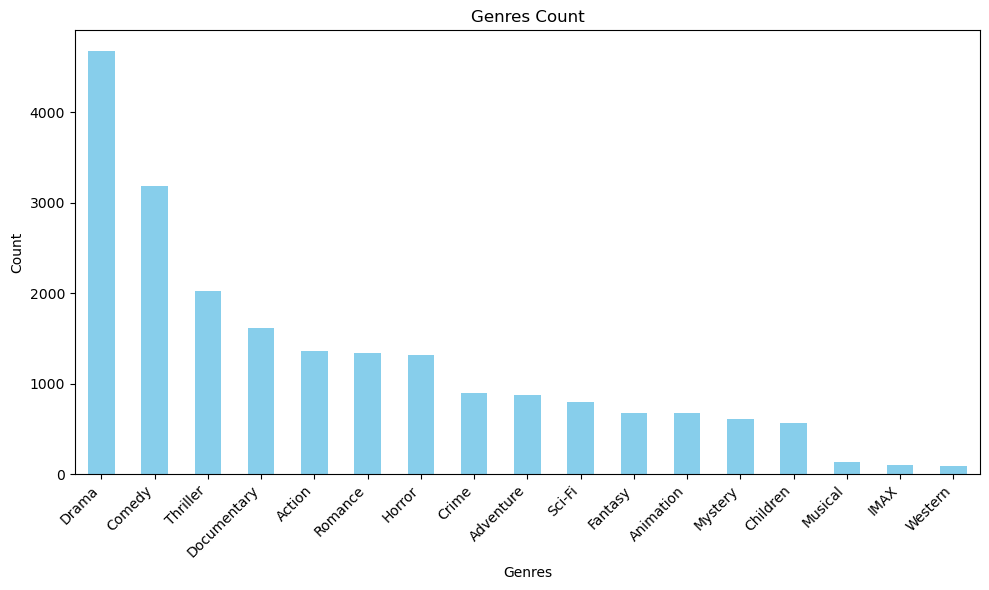

In [8]:
import matplotlib.pyplot as plt

df = pd.DataFrame(user_item_matrix)

# Summing up genres to get total count
genre_counts = df.iloc[:, 4:].sum()

# Sorting genres in descending order
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Plotting the sorted genres
plt.figure(figsize=(10, 6))
genre_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Genres Count')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()